In [143]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [74]:
nlp = spacy.load('fr_core_news_lg')

In [2]:
path = "../../../L3/S2/stage/"

In [116]:
corpus = {}
femmes = []
hommes = []

for filename in os.listdir(path+"corpus_femmes") :
    with open(f"{path}corpus_femmes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        femmes.append(noun)
        corpus[noun] = file.read()
        
for filename in os.listdir(path+"corpus_hommes") :
    with open(f"{path}corpus_hommes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        hommes.append(noun)
        corpus[noun] = file.read()
        

In [ ]:
def get_freq_matrix(train):
    vectorizer = CountVectorizer(analyzer='word')
    matrix = vectorizer.fit_transform(train)
    tokens = vectorizer.get_feature_names_out()
    return matrix, tokens

In [118]:
matrix, vocab = get_freq_matrix(corpus.values())
matrix_femmes = matrix[:len(femmes)]
matrix_hommes = matrix[len(femmes):]

In [120]:
general_count_femmes = np.sum(matrix_femmes.toarray(),axis=0)
general_count_hommes = np.sum(matrix_hommes.toarray(),axis=0)

n_word_femmes = sum(general_count_femmes)
n_word_hommes = sum(general_count_hommes)

In [121]:
classement_femmes = sorted(zip(vocab,general_count_femmes), key=lambda item:item[1], reverse=True)
classement_hommes = sorted(zip(vocab,general_count_hommes), key=lambda item:item[1], reverse=True)

dict_femmes = dict(classement_femmes)
dict_hommes = dict(classement_hommes)

In [122]:
racines = {
    "tristesse" : [
        "triste", "tristesse", "tristes", "tristement", 
        "attristé", "attristée", "attristés", "attristées"
        ],
    "peine" : [
        "peine", "peiné", "peines"
        ],
    "chagin" : [
        "chagrin", "chagriné", "chagrinée", 
        "chagrine","chagriner"
        ]
}

In [123]:
racine2freq_femmes = {}
racine2freq_hommes = {}

for racine in racines :
    for word in racines[racine]:
        racine2freq_femmes[racine] = racine2freq_femmes.get(racine,0)+dict_femmes[word]
        racine2freq_hommes[racine] = racine2freq_hommes.get(racine,0)+dict_hommes[word]

In [125]:
print(racine2freq_femmes)
print(racine2freq_hommes)

{'tristesse': 848, 'peine': 1115, 'chagin': 204}
{'tristesse': 772, 'peine': 1360, 'chagin': 247}


In [147]:
freq_femmes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_femmes.toarray()]
freq_hommes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_hommes.toarray()]
count_tristesse_femmes = [frequences["tristesse"] for frequences in freq_femmes]
count_tristesse_hommes = [frequences["tristesse"] for frequences in freq_hommes]

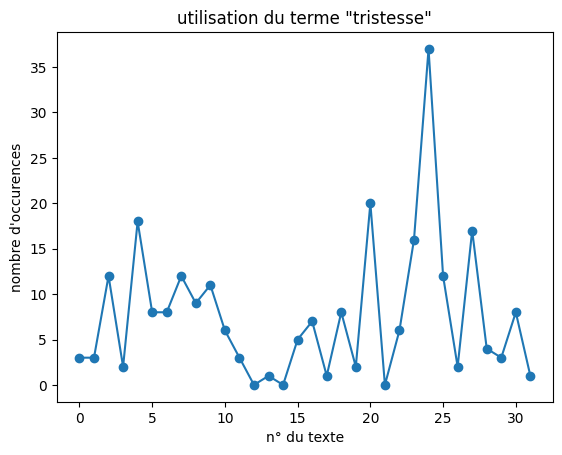

In [146]:
x = range(len(count_tristesse_femmes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_tristesse_femmes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title('utilisation du terme "tristesse"')

plt.show()  # Display the graph

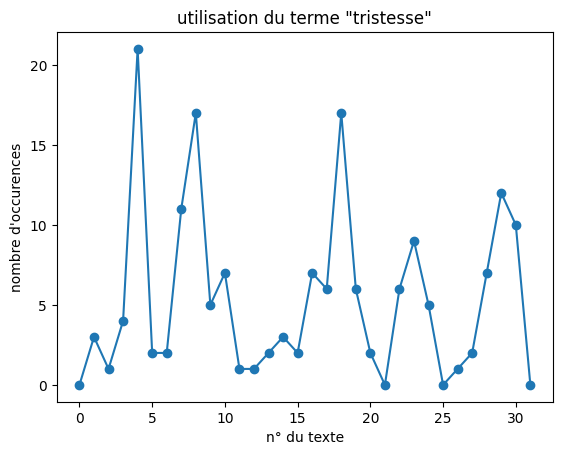

In [148]:
x = range(len(count_tristesse_hommes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_tristesse_hommes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title('utilisation du terme "tristesse"')

plt.show()  # Display the graph